In [1]:
import numpy as np
from sympy import symbols, Piecewise, expand
import matplotlib.pyplot as plt
import math
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'FangSong', 'STXihei', 'WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

x_points = [1, 2, 3, 4]
y_points = [1, 4, 9, 16]
x = 1.5

In [2]:

def observe_loss_of_significance():
    """
    观察有效数字丢失现象：
    比较两种等价函数在x增大时的数值稳定性
    """
    print("x\t\t\t\tf1(x)\t\t\t\t\tf2(x)\t\t\t\t\tDifference")
    for exponent in range(0, 15):
        x = 10 ** exponent
        f1 = math.sqrt(x) * (math.sqrt(x + 1) - math.sqrt(x))
        f2 = math.sqrt(x) / (math.sqrt(x + 1) + math.sqrt(x))
        diff = abs(f1 - f2)
        print(f"{x}\t\t\t{f1:.20f}\t\t\t{f2:.20f}\t\t\t{diff:.20f}")

# 运行测试
observe_loss_of_significance()

x				f1(x)					f2(x)					Difference
1			0.41421356237309514547			0.41421356237309508996			0.00000000000000005551
10			0.48808848170151475365			0.48808848170151547530			0.00000000000000072164
100			0.49875621120889945814			0.49875621120890273330			0.00000000000000327516
1000			0.49987506246102186847			0.49987506246096485851			0.00000000000005700995
10000			0.49998750062485441958			0.49998750062496088997			0.00000000000010647039
100000			0.49999875000592886032			0.49999875000624993682			0.00000000000032107650
1000000			0.49999987504634191282			0.49999987500006248808			0.00000000004627942474
10000000			0.49999998740115092488			0.49999998750000057557			0.00000000009884965069
100000000			0.50000000555883161724			0.49999999874999995209			0.00000000680883166515
1000000000			0.50000007799750634252			0.49999999987499998966			0.00000007812250635286
10000000000			0.49999944167211651802			0.49999999998750005448			0.00000055831538353646
100000000000			0.50000444963116807973			0.49999999999874999990

插值多项式: x**2
f(1.5) = 2.25


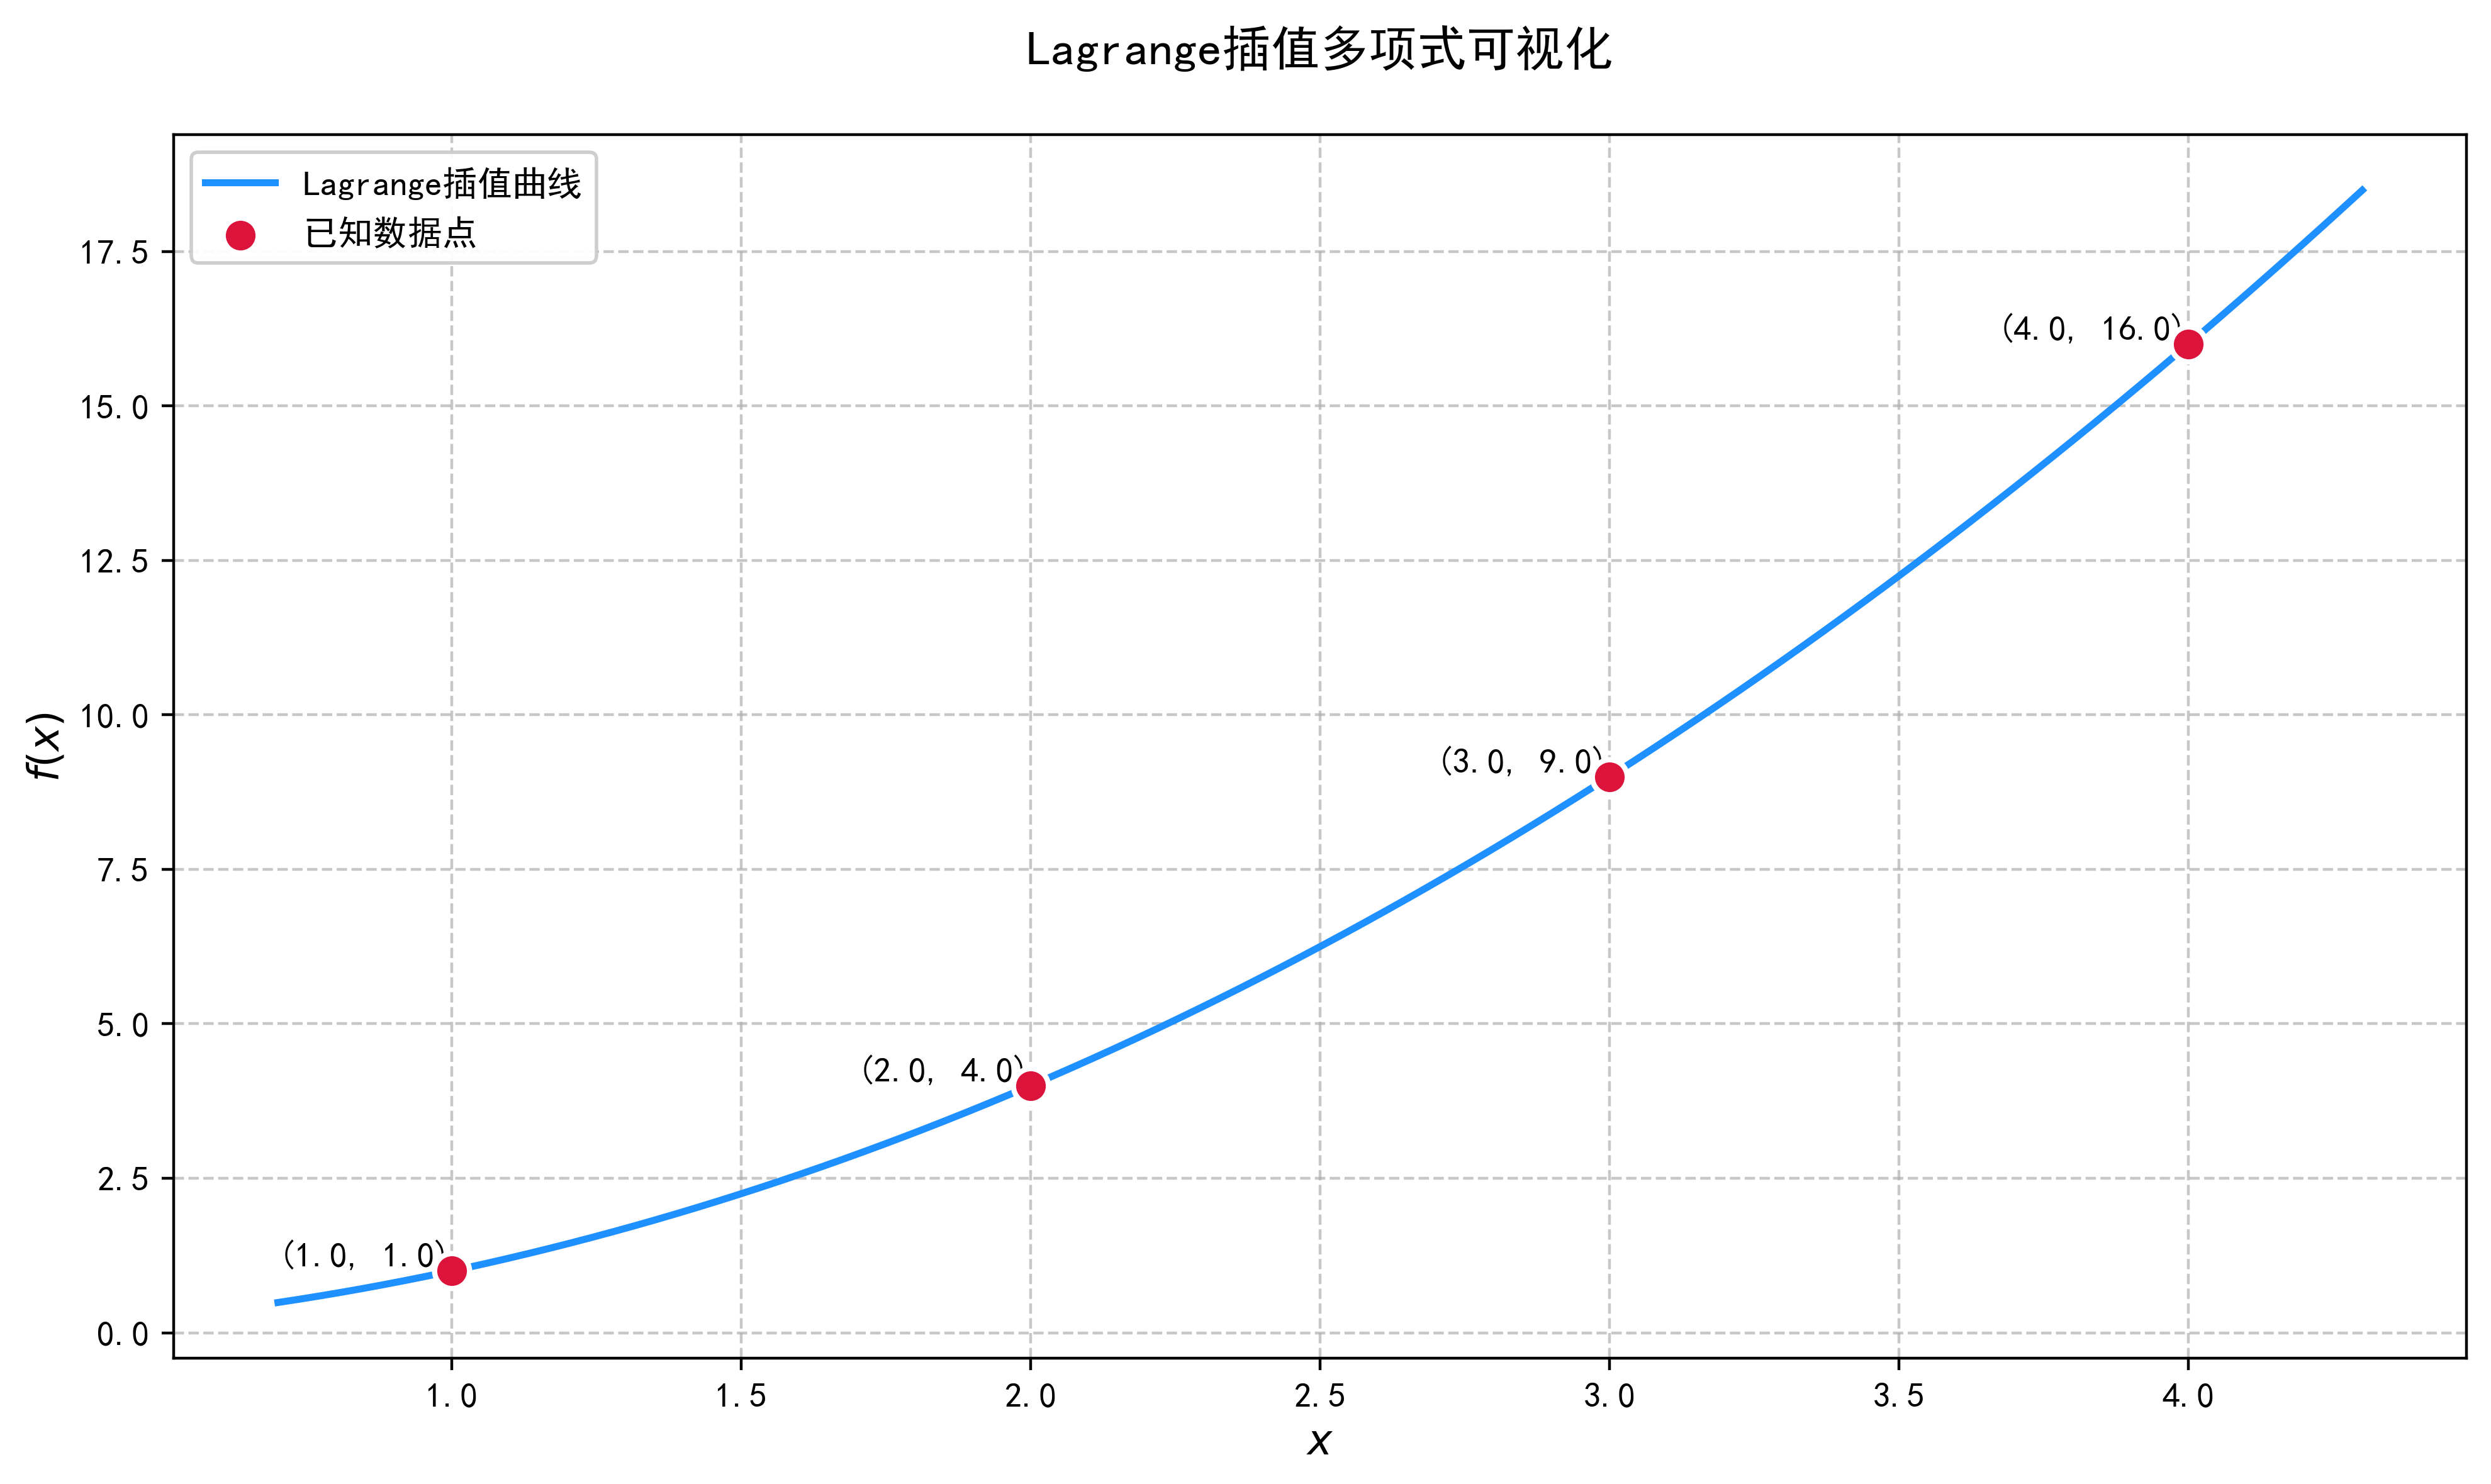

In [3]:
def lagrange_interpolation(x_values, y_values, x):
    """
    计算给定点x的n次Lagrange插值结果
    
    参数:
    x_values (list): 已知点的x坐标列表
    y_values (list): 已知点的y坐标列表
    x (float): 需要计算插值的x值
    
    返回:
    float: 插值结果
    """
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values和y_values的长度必须相同")
    if len(set(x_values)) != n:
        raise ValueError("x_values中存在重复的点")
    
    result = 0.0
    for i in range(n):
        # 计算基函数L_i(x)
        numerator = 1.0
        denominator = 1.0
        for j in range(n):
            if j != i:
                numerator *= (x - x_values[j])
                denominator *= (x_values[i] - x_values[j])
        result += y_values[i] * (numerator / denominator)
    return result

def lagrange_polynomial(x_values, y_values):
    """
    生成Lagrange插值多项式
    
    参数:
    x_values (list): 已知点的x坐标列表
    y_values (list): 已知点的y坐标列表
    
    返回:
    sympy表达式: 插值多项式
    """
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values和y_values的长度必须相同")
    if len(set(x_values)) != n:
        raise ValueError("x_values中存在重复的点")
    
    x = symbols('x')
    polynomial = 0
    for i in range(n):
        term = y_values[i]
        numerator = 1
        denominator = 1
        for j in range(n):
            if j != i:
                numerator *= (x - x_values[j])
                denominator *= (x_values[i] - x_values[j])
        polynomial += term * (numerator / denominator)
    return expand(polynomial)


def plot_lagrange_curve(x_known, y_known, x_min=None, x_max=None, num_points=500):
    """
    可视化Lagrange插值曲线
    
    参数:
    x_known: 已知点的x坐标列表
    y_known: 已知点的y坐标列表
    x_min: 作图范围下限（默认自动扩展）
    x_max: 作图范围上限（默认自动扩展）
    num_points: 插值点数量
    """
    # 自动扩展绘图范围
    if x_min is None:
        x_min = min(x_known) - 0.1*(max(x_known)-min(x_known))
    if x_max is None:
        x_max = max(x_known) + 0.1*(max(x_known)-min(x_known))
    
    # 生成插值点
    x_interp = np.linspace(x_min, x_max, num_points)
    y_interp = [lagrange_interpolation(x_known, y_known, x) for x in x_interp]
    
    # 创建图表
    plt.figure(figsize=(10, 6), dpi=400)
    
    # 绘制插值曲线
    plt.plot(x_interp, y_interp, label="Lagrange插值曲线", 
             color="dodgerblue", linewidth=2)
    
    # 绘制已知点
    plt.scatter(x_known, y_known, color="crimson", s=100, zorder=5,
                label="已知数据点", edgecolor='w', linewidth=1.5)
    
    # 添加装饰元素
    plt.title("Lagrange插值多项式可视化", fontsize=14, pad=20)
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$f(x)$", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(frameon=True, framealpha=0.95)
    
    # 显示坐标点数值
    for x, y in zip(x_known, y_known):
        plt.text(x, y, f' ({x:.1f}, {y:.1f})', fontsize=10,
                 verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# 示例用法
poly = lagrange_polynomial(x_points, y_points)
print(f"插值多项式: {poly}")  # 输出：插值多项式: x**2

print(f"f({x}) = {lagrange_interpolation(x_points, y_points, x)}")  # 输出：f(1.5) = 2.25

plot_lagrange_curve(x_points, y_points)

插值多项式: 1.0*x**2
f(1.5) = 2.25


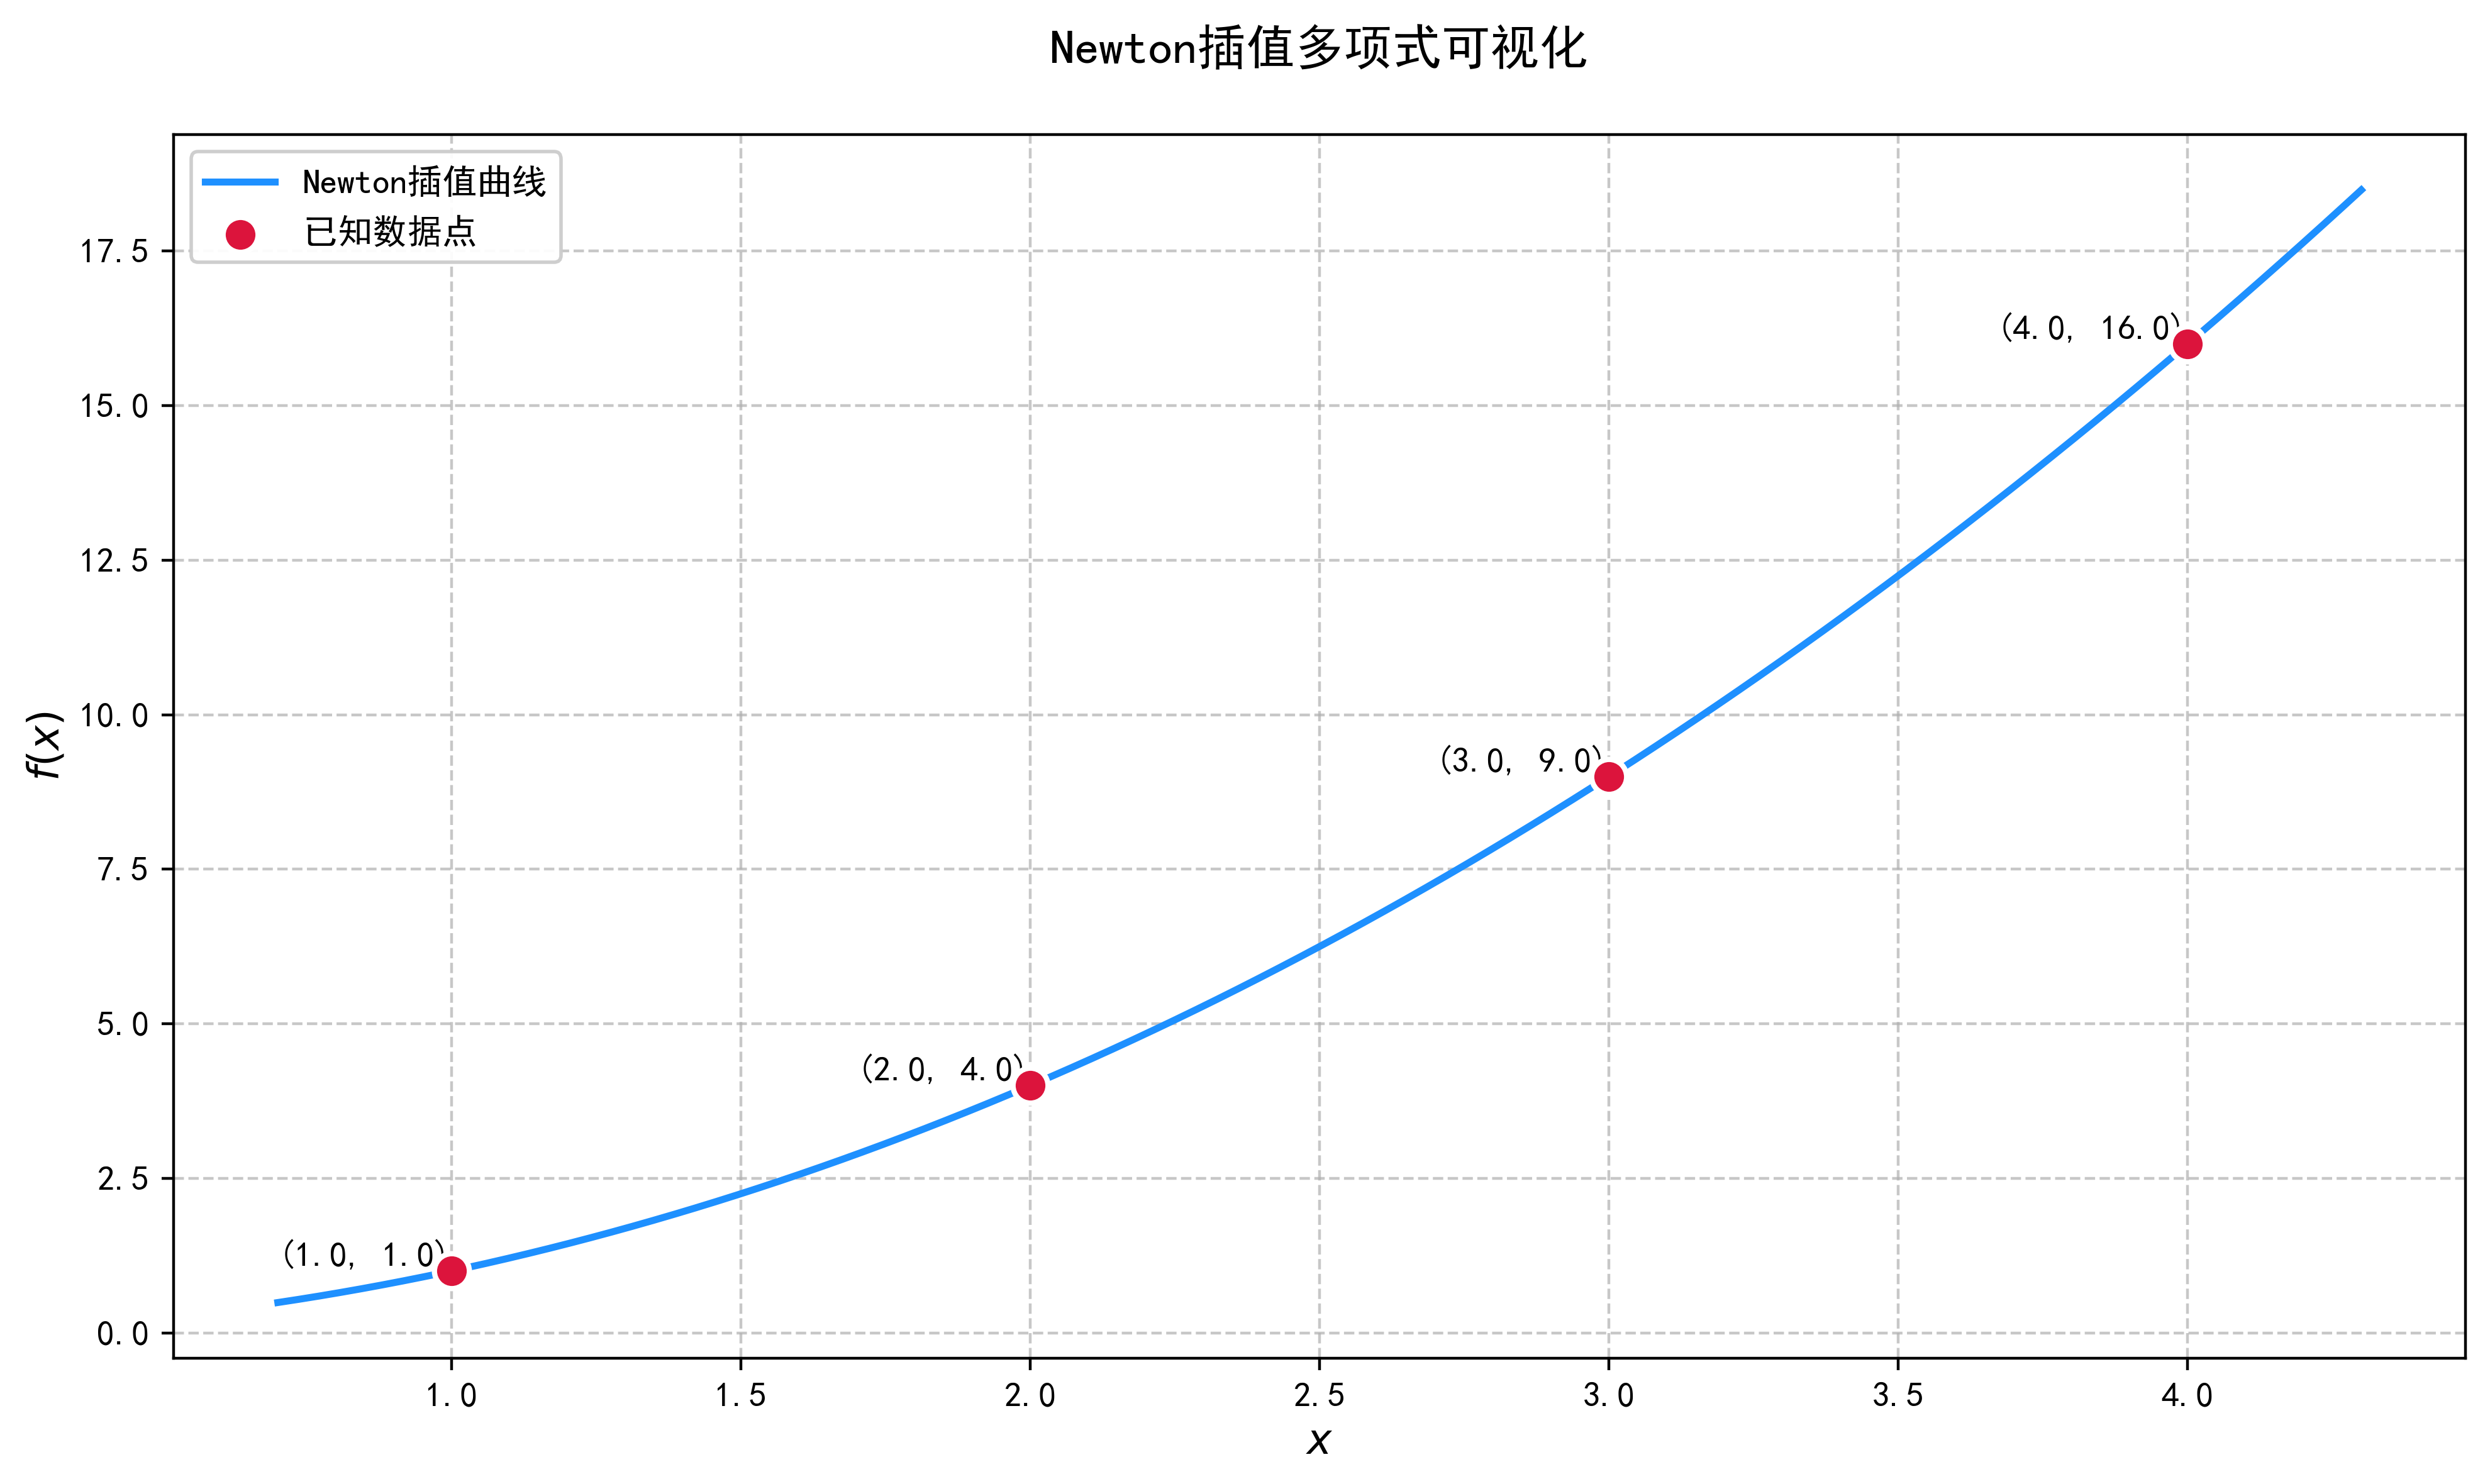

In [4]:
def newton_interpolation(x_values, y_values, x):
    """
    计算给定点x的n次Newton插值结果
    
    参数:
    x_values (list): 已知点的x坐标列表
    y_values (list): 已知点的y坐标列表
    x (float): 需要计算插值的x值
    
    返回:
    float: 插值结果
    """
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values和y_values的长度必须相同")
    if len(set(x_values)) != n:
        raise ValueError("x_values中存在重复的点")
    
    # 构造差商表
    divided_diff = [[] for _ in range(n)]
    for yi in y_values:
        divided_diff[0].append(yi)
    
    for j in range(1, n):
        for i in range(n - j):
            numerator = divided_diff[j-1][i+1] - divided_diff[j-1][i]
            denominator = x_values[i+j] - x_values[i]
            divided_diff[j].append(numerator / denominator)
    
    # 计算插值结果
    result = 0.0
    for i in range(n):
        term = divided_diff[i][0]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

def newton_polynomial(x_values, y_values):
    """
    生成Newton插值多项式
    
    参数:
    x_values (list): 已知点的x坐标列表
    y_values (list): 已知点的y坐标列表
    
    返回:
    sympy表达式: 插值多项式
    """
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values和y_values的长度必须相同")
    if len(set(x_values)) != n:
        raise ValueError("x_values中存在重复的点")
    
    # 构造差商表
    divided_diff = [[] for _ in range(n)]
    for yi in y_values:
        divided_diff[0].append(yi)
    
    for j in range(1, n):
        for i in range(n - j):
            numerator = divided_diff[j-1][i+1] - divided_diff[j-1][i]
            denominator = x_values[i+j] - x_values[i]
            divided_diff[j].append(numerator / denominator)
    
    # 构建符号表达式
    x = symbols('x')
    polynomial = 0
    for i in range(n):
        term = divided_diff[i][0]
        for j in range(i):
            term *= (x - x_values[j])
        polynomial += term
    return expand(polynomial)

def plot_newton_curve(x_known, y_known, x_min=None, x_max=None, num_points=500):
    """
    可视化newton插值曲线
    
    参数:
    x_known: 已知点的x坐标列表
    y_known: 已知点的y坐标列表
    x_min: 作图范围下限（默认自动扩展）
    x_max: 作图范围上限（默认自动扩展）
    num_points: 插值点数量
    """
    # 自动扩展绘图范围
    if x_min is None:
        x_min = min(x_known) - 0.1*(max(x_known)-min(x_known))
    if x_max is None:
        x_max = max(x_known) + 0.1*(max(x_known)-min(x_known))
    
    # 生成插值点
    x_interp = np.linspace(x_min, x_max, num_points)
    y_interp = [newton_interpolation(x_known, y_known, x) for x in x_interp]
    
    # 创建图表
    plt.figure(figsize=(10, 6), dpi=400)
    
    # 绘制插值曲线
    plt.plot(x_interp, y_interp, label="Newton插值曲线", 
             color="dodgerblue", linewidth=2)
    
    # 绘制已知点
    plt.scatter(x_known, y_known, color="crimson", s=100, zorder=5,
                label="已知数据点", edgecolor='w', linewidth=1.5)
    
    # 添加装饰元素
    plt.title("Newton插值多项式可视化", fontsize=14, pad=20)
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$f(x)$", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(frameon=True, framealpha=0.95)
    
    # 显示坐标点数值
    for x, y in zip(x_known, y_known):
        plt.text(x, y, f' ({x:.1f}, {y:.1f})', fontsize=10,
                 verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

poly = newton_polynomial(x_points, y_points)
print(f"插值多项式: {poly}")

print(f"f({x}) = {newton_interpolation(x_points, y_points, x)}")  # 输出：f(1.5) = 2.25

plot_newton_curve(x_points, y_points)

自然边界条件插值结果：
6.3500000000000005

分段多项式表达式：
Piecewise((0.2*x**3 - 0.6*x**2 + 3.4*x - 2.0, (x >= 1) & (x <= 2)), (0.6*x**2 + 2.0*x - 2.4, (x >= 2) & (x <= 3)), (-0.2*x**3 + 2.4*x**2 - 2.4*x + 1.77635683940025e-15, (x >= 3) & (x <= 4)))

固定边界条件插值结果：
6.333333333333333


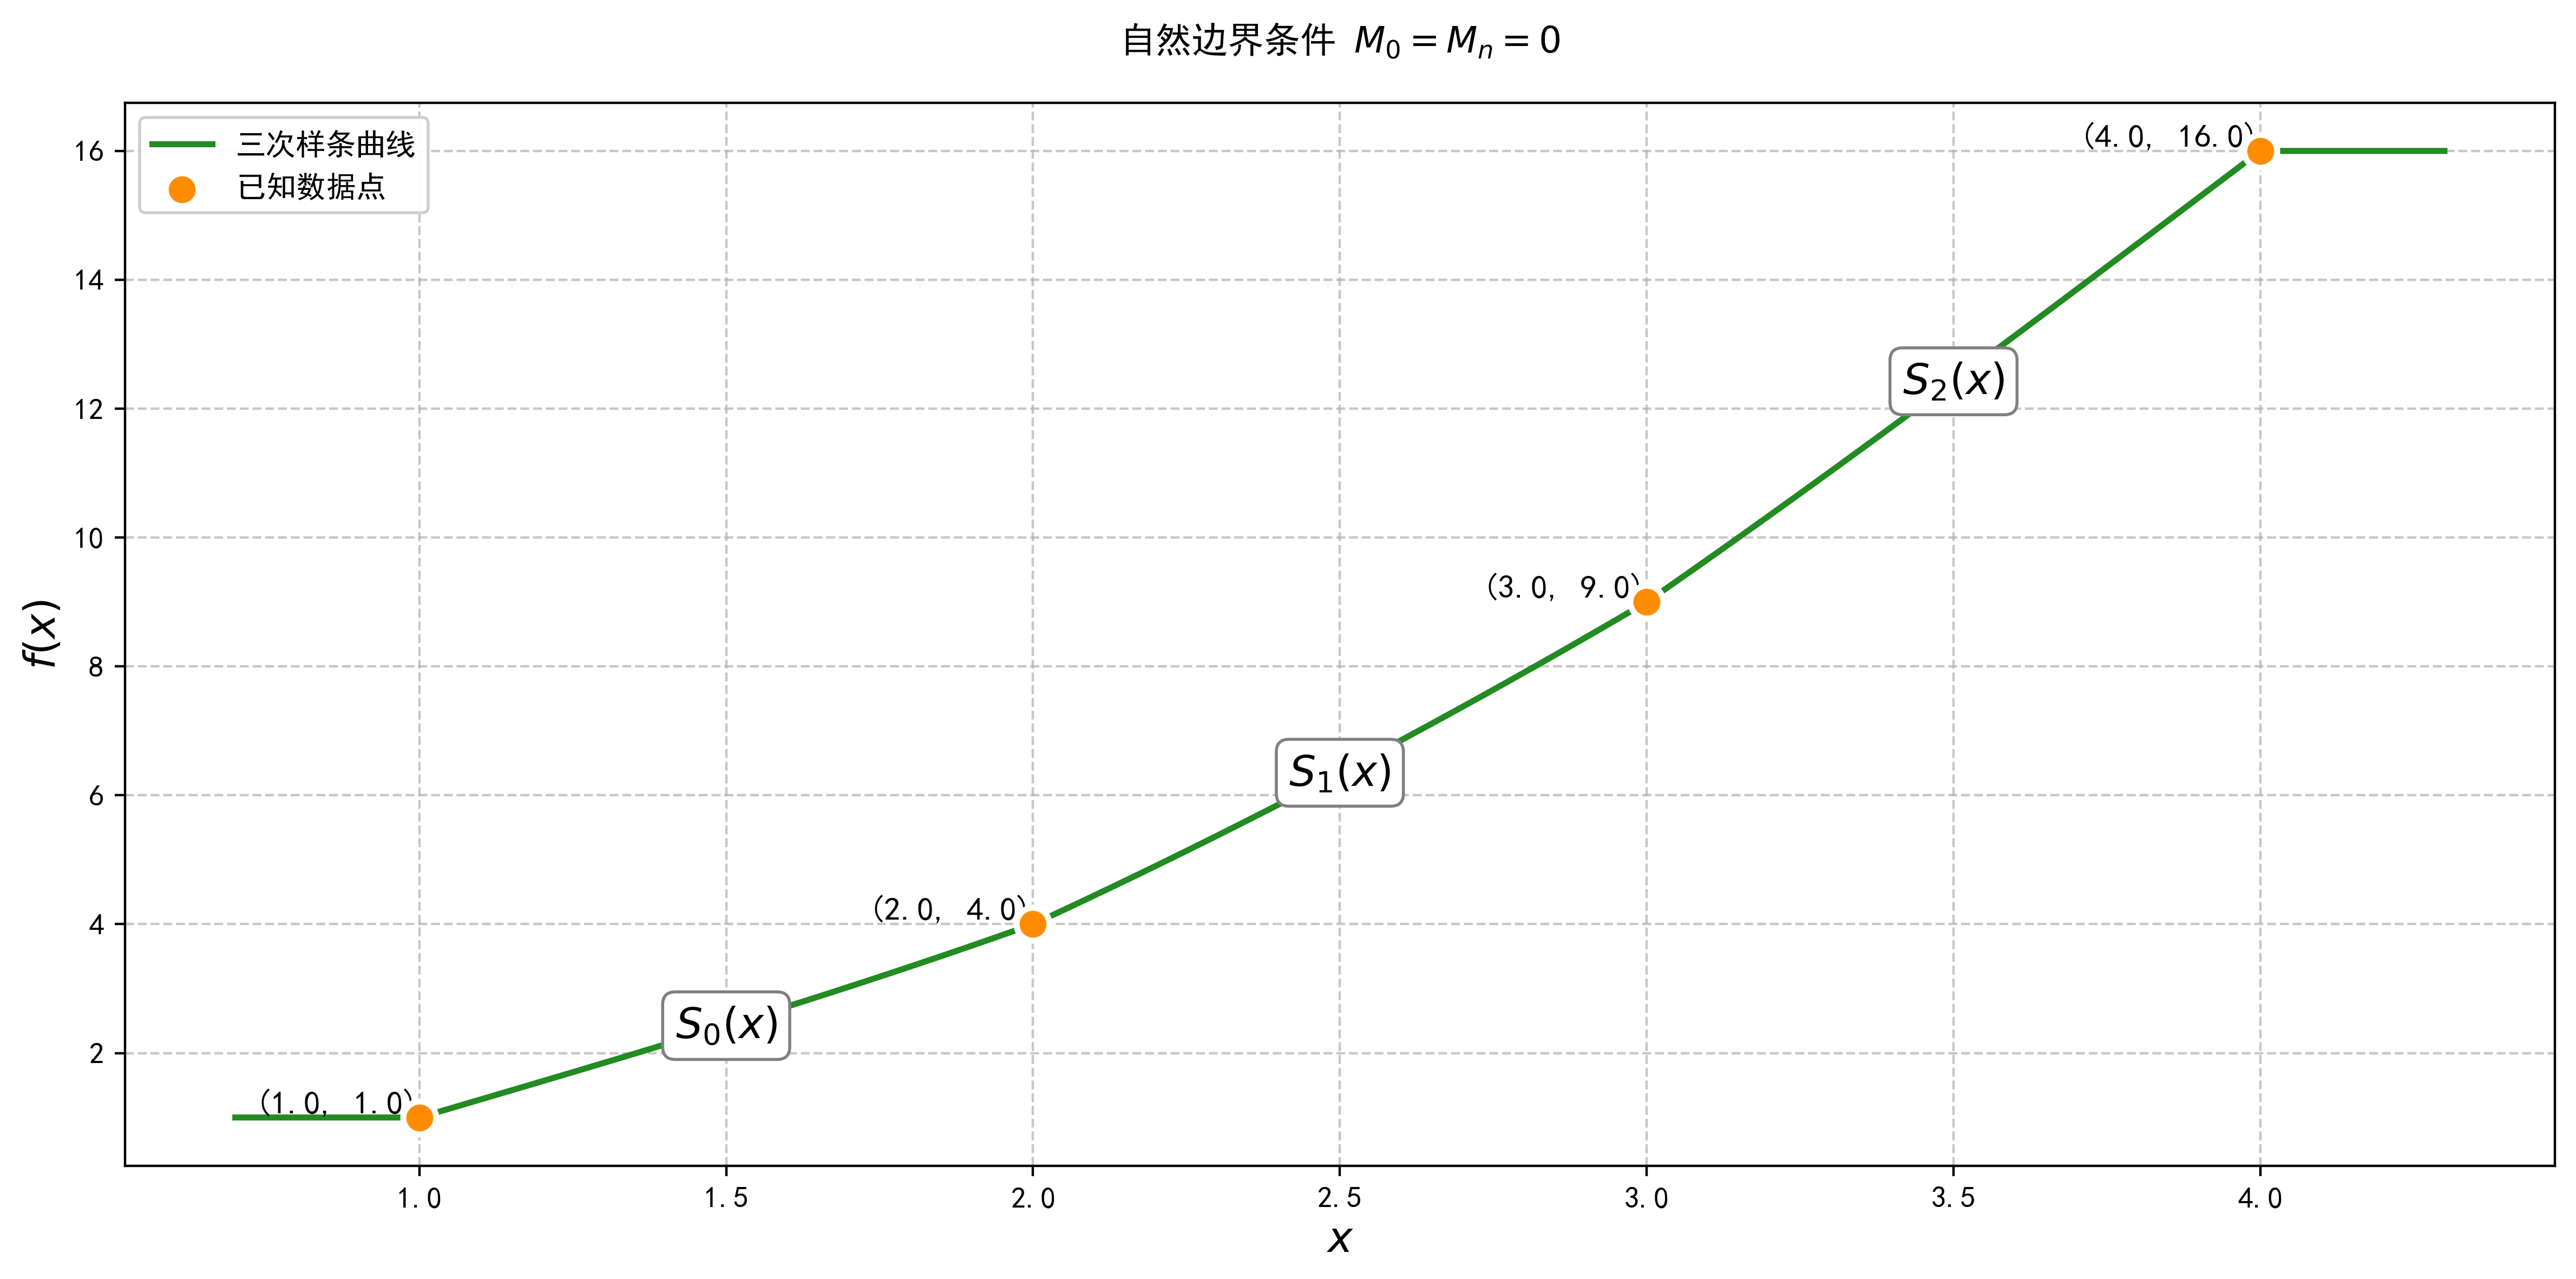

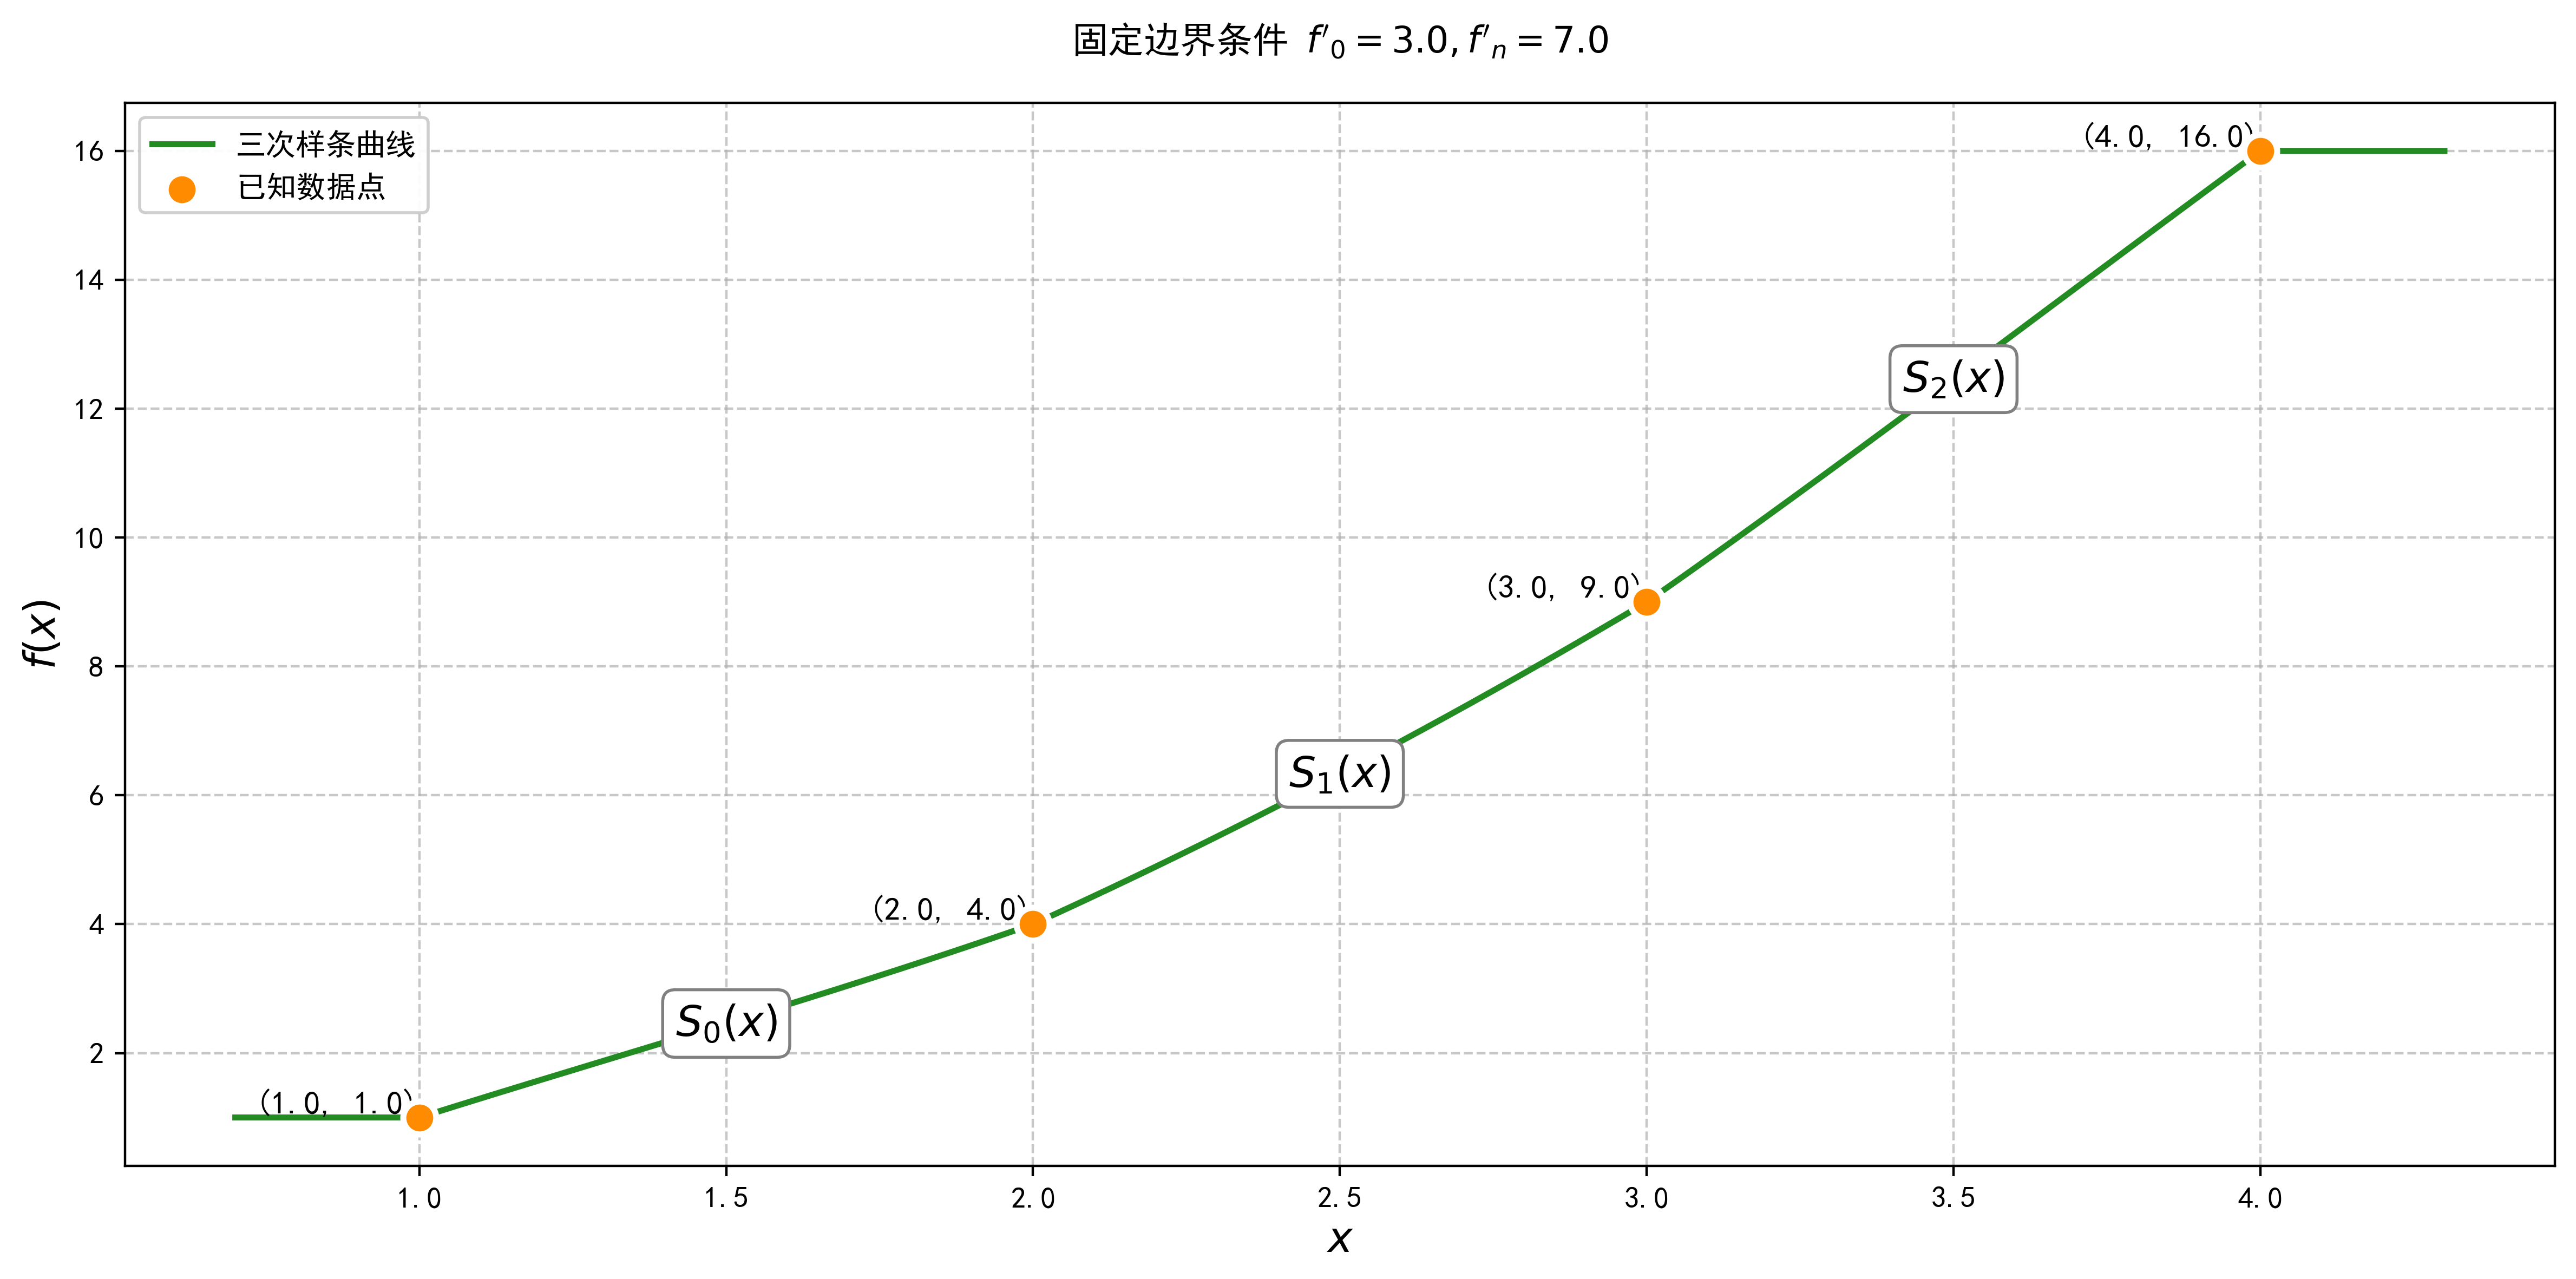

In [5]:
def cubic_spline_interpolation(x_values, y_values, x, boundary='natural', deriv0=None, derivn=None):
    """
    三次样条插值实现
    
    参数:
    x_values (list): 已知点的x坐标（严格递增）
    y_values (list): 已知点的y坐标
    x (float): 需要计算插值的x值
    boundary (str): 边界条件类型，可选：
        'natural' - 自然边界条件（默认）
        'clamped' - 固定边界条件（需提供deriv0和derivn）
    deriv0 (float): 固定边界条件左端点一阶导数
    derivn (float): 固定边界条件右端点一阶导数
    
    返回:
    float: 插值结果
    """
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values和y_values的长度必须相同")
    if any(x_values[i] >= x_values[i+1] for i in range(n-1)):
        raise ValueError("x_values必须严格递增")
    
    # 构造h矩阵（区间长度）
    h = [x_values[i+1] - x_values[i] for i in range(n-1)]
    
    # 构造系数矩阵和右侧向量
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    if boundary == 'natural':
        # 自然边界条件
        A[0, 0] = 1
        A[-1, -1] = 1
    elif boundary == 'clamped':
        if deriv0 is None or derivn is None:
            raise ValueError("固定边界条件需要提供deriv0和derivn参数")
        A[0, 0] = 2*h[0]
        A[0, 1] = h[0]
        b[0] = 3*(y_values[1]-y_values[0])/h[0] - 3*deriv0
        A[-1, -2] = h[-1]
        A[-1, -1] = 2*h[-1]
        b[-1] = 3*derivn - 3*(y_values[-1]-y_values[-2])/h[-1]
    else:
        raise ValueError("不支持的边界条件类型")
    
    # 构造中间行
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2*(h[i-1]+h[i])
        A[i, i+1] = h[i]
        b[i] = 3*((y_values[i+1]-y_values[i])/h[i] - (y_values[i]-y_values[i-1])/h[i-1])
    
    # 解方程组得到二阶导数M
    M = np.linalg.solve(A, b)
    
    # 查找x所在的区间
    if x <= x_values[0]:
        return y_values[0]
    if x >= x_values[-1]:
        return y_values[-1]
    k = 0
    for i in range(n-1):
        if x_values[i] <= x <= x_values[i+1]:
            k = i
            break
    
    # 计算插值结果
    h_k = h[k]
    x_k = x_values[k]
    y_k = y_values[k]
    m_k = M[k]
    m_k1 = M[k+1]
    t = (x - x_k)/h_k
    a = y_k
    b = (y_values[k+1] - y_k)/h_k - h_k*(2*m_k + m_k1)/6
    c = m_k/2
    d = (m_k1 - m_k)/(6*h_k)
    return a + b*(x - x_k) + c*(x - x_k)**2 + d*(x - x_k)**3

def cubic_spline_polynomials(x_values, y_values, boundary='natural', deriv0=None, derivn=None):
    """
    生成三次样条插值的分段多项式表达式
    
    参数与返回值同上，返回sympy的分段函数表达式
    """
    n = len(x_values)
    x = symbols('x')
    pieces = []
    # 构造M矩阵
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    if boundary == 'natural':
        A[0, 0] = 1
        A[-1, -1] = 1
    elif boundary == 'clamped':
        A[0, 0] = 2*(x_values[1]-x_values[0])
        A[0, 1] = (x_values[1]-x_values[0])
        b[0] = 3*((y_values[1]-y_values[0])/(x_values[1]-x_values[0]) - deriv0)
        A[-1, -2] = (x_values[-1]-x_values[-2])
        A[-1, -1] = 2*(x_values[-1]-x_values[-2])
        b[-1] = 3*(derivn - (y_values[-1]-y_values[-2])/(x_values[-1]-x_values[-2]))
    
    for i in range(1, n-1):
        h_prev = x_values[i] - x_values[i-1]
        h_curr = x_values[i+1] - x_values[i]
        A[i, i-1] = h_prev
        A[i, i] = 2*(h_prev + h_curr)
        A[i, i+1] = h_curr
        b[i] = 3*((y_values[i+1]-y_values[i])/h_curr - (y_values[i]-y_values[i-1])/h_prev)
    
    M = np.linalg.solve(A, b)
    
    # 构造分段函数
    expressions = []
    for i in range(n-1):
        h = x_values[i+1] - x_values[i]
        a = y_values[i]
        b = (y_values[i+1]-y_values[i])/h - h*(2*M[i]+M[i+1])/6
        c = M[i]/2
        d = (M[i+1]-M[i])/(6*h)
        expr = a + b*(x - x_values[i]) + c*(x - x_values[i])**2 + d*(x - x_values[i])**3
        condition = (x >= x_values[i]) & (x <= x_values[i+1])
        expressions.append((expand(expr), condition))
    
    return Piecewise(*expressions)

def plot_cubic_spline(x_known, y_known, boundary='natural', deriv0=None, derivn=None, 
                     x_min=None, x_max=None, num_points=500):
    """
    可视化三次样条插值曲线
    
    参数:
    x_known (list): 已知点的x坐标（严格递增）
    y_known (list): 已知点的y坐标
    boundary (str): 边界条件类型
    deriv0 (float): 固定边界左端点导数
    derivn (float): 固定边界右端点导数
    x_min (float): 作图范围下限（默认自动扩展）
    x_max (float): 作图范围上限（默认自动扩展）
    num_points (int): 每个区间生成的插值点数
    """
    n = len(x_known)
    if n != len(y_known):
        raise ValueError("x_known和y_known的长度必须相同")
    if any(x_known[i] >= x_known[i+1] for i in range(n-1)):
        raise ValueError("x_known必须严格递增")
    
    # 自动扩展绘图范围
    if x_min is None:
        x_min = x_known[0] - 0.1*(x_known[-1]-x_known[0])
    if x_max is None:
        x_max = x_known[-1] + 0.1*(x_known[-1]-x_known[0])
    
    # 生成所有插值点
    x_interp = []
    # 每个区间生成num_points个点
    for i in range(n-1):
        start = x_known[i]
        end = x_known[i+1]
        interval_points = np.linspace(start, end, num_points)
        x_interp.extend(interval_points)
    # 添加扩展范围的点
    x_interp = np.array(x_interp)
    x_full = np.linspace(x_min, x_max, 2*num_points)
    
    # 计算插值结果
    y_interp = [cubic_spline_interpolation(x_known, y_known, xi, boundary, deriv0, derivn) 
                for xi in x_full]
    
    # 创建图表
    plt.figure(figsize=(12, 6), dpi=400)
    
    # 绘制插值曲线
    plt.plot(x_full, y_interp, label="三次样条曲线", color="forestgreen", linewidth=2)
    
    # 绘制已知点
    plt.scatter(x_known, y_known, color="darkorange", s=120, zorder=5,
                label="已知数据点", edgecolor='w', linewidth=2)
    
    # 添加边界条件标注
    if boundary == 'natural':
        plt.title(r"自然边界条件 $M_0 = M_n = 0$", y=1.03)
    else:
        plt.title(fr"固定边界条件 $f'_0 = {deriv0:.1f}, f'_n = {derivn:.1f}$", y=1.03)
    
    # 添加装饰元素
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$f(x)$", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(frameon=True, framealpha=0.95, loc='upper left')
    
    # 显示坐标点数值
    for x, y in zip(x_known, y_known):
        plt.text(x, y, f' ({x:.1f}, {y:.1f})', fontsize=11,
                 verticalalignment='bottom', horizontalalignment='right')
    
    # 添加分段多项式标注
    for i in range(n-1):
        x_center = (x_known[i] + x_known[i+1])/2
        y_center = cubic_spline_interpolation(x_known, y_known, x_center, boundary, deriv0, derivn)
        plt.text(x_center, y_center, f'$S_{i}(x)$', fontsize=14, 
                 ha='center', va='center', bbox=dict(boxstyle='round', fc='white', ec='gray'))
    
    plt.tight_layout()
    plt.show()

# 自然边界条件
print("自然边界条件插值结果：")
print(cubic_spline_interpolation(x_points, y_points, 2.5))

# 生成多项式表达式
poly = cubic_spline_polynomials(x_points, y_points)
print("\n分段多项式表达式：")
print(poly)

# 固定边界条件（假设端点导数为3）
print("\n固定边界条件插值结果：")
print(cubic_spline_interpolation(x_points, y_points, 2.5, boundary='clamped', deriv0=3, derivn=7))

# 自然边界条件可视化
plot_cubic_spline(x_points, y_points, boundary='natural')
    
# 固定边界条件可视化（导数设为2和10）
plot_cubic_spline(x_points, y_points, boundary='clamped', deriv0=3, derivn=7)

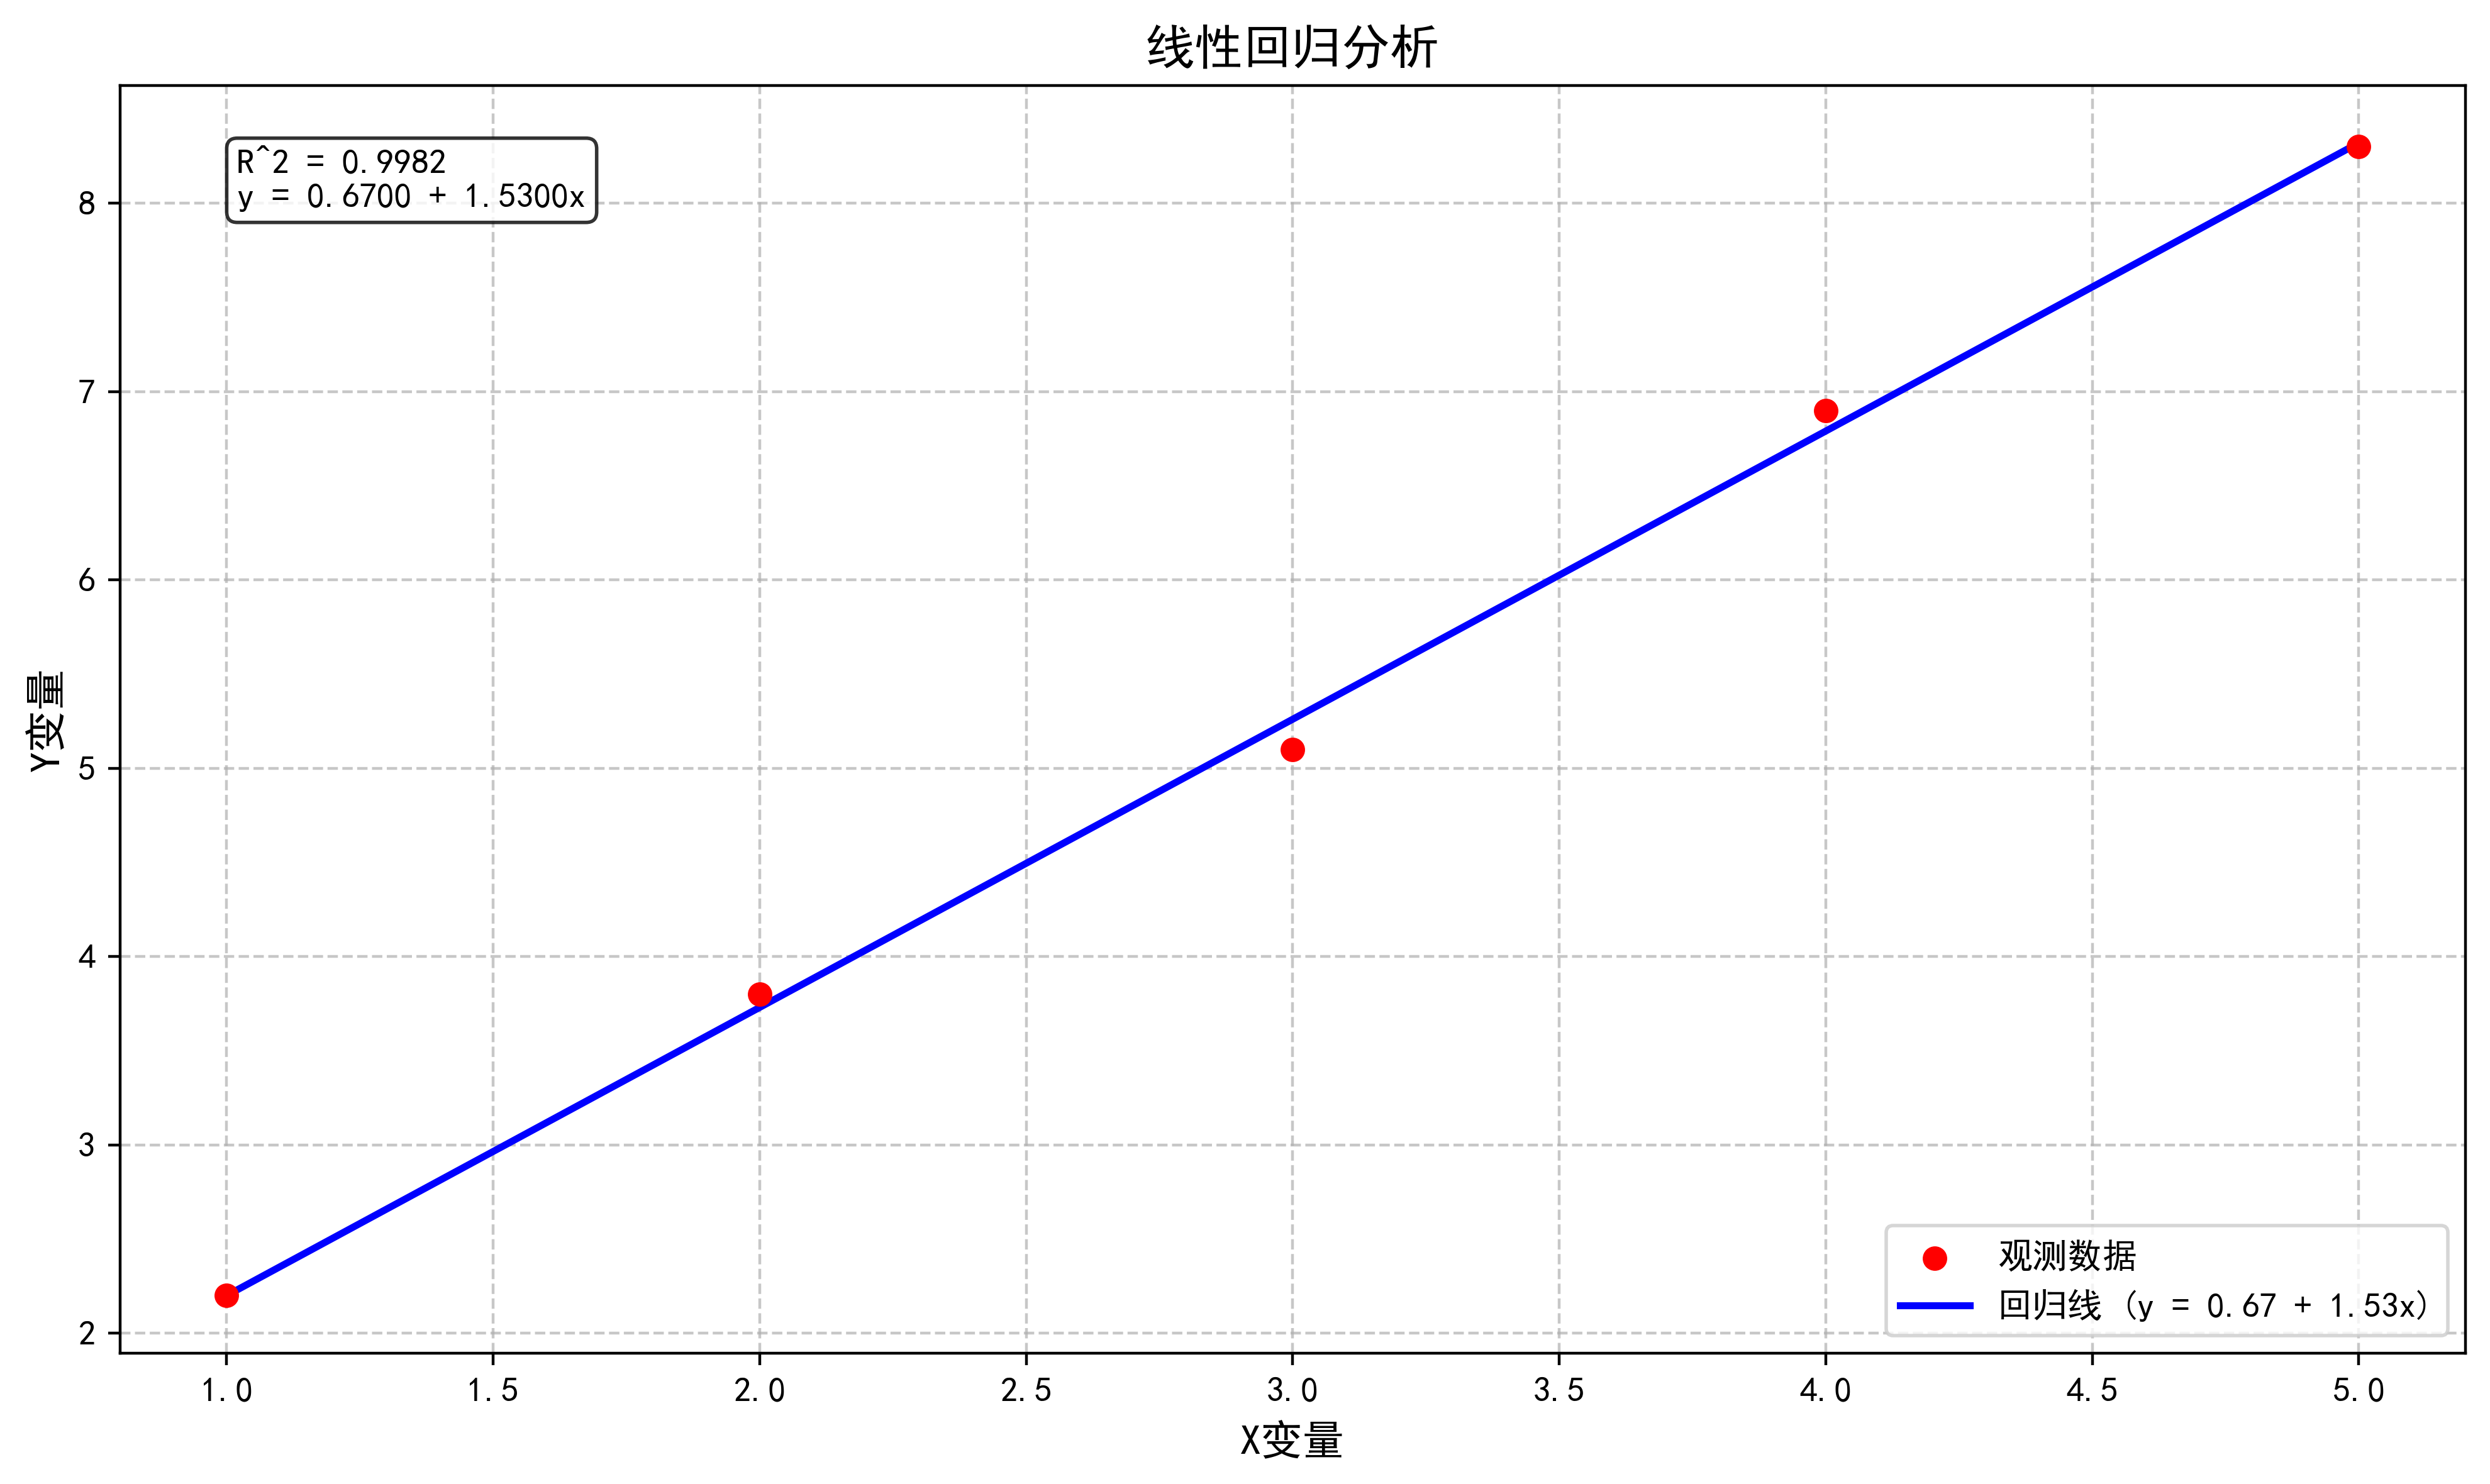

In [11]:
def linear_regression(x, y, plot=False, title="Linear Regression", xlabel="x", ylabel="y"):
    """
    一元线性回归：y = a + b*x，可选数据可视化
    
    参数:
    x (array-like): 自变量数据
    y (array-like): 因变量数据
    plot (bool): 是否生成可视化图表
    title (str): 图表标题
    xlabel (str): x轴标签
    ylabel (str): y轴标签
    
    返回:
    tuple: (a, b, r_squared)
    """
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    
    # 输入验证
    if n != len(y):
        raise ValueError("x和y的长度必须相同")
    if n < 2:
        raise ValueError("至少需要2个数据点")
    
    # 计算统计量
    Sx = np.sum(x)
    Sy = np.sum(y)
    Sxx = np.sum(x**2)
    Sxy = np.sum(x*y)
    
    # 计算回归系数
    denominator = n*Sxx - Sx**2
    a = (Sy*Sxx - Sx*Sxy) / denominator
    b = (n*Sxy - Sx*Sy) / denominator
    
    # 计算R²
    y_pred = a + b*x
    SS_total = np.sum((y - np.mean(y))**2)
    SS_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (SS_residual / SS_total)
    
    # 可视化部分
    if plot:
        plt.figure(figsize=(10, 6),dpi=400)
        plt.scatter(x, y, color='red', label='观测数据', zorder=3)
        
        # 生成回归线
        x_line = np.array([min(x), max(x)])
        y_line = a + b*x_line
        plt.plot(x_line, y_line, color='blue', label=f'回归线 (y = {a:.2f} + {b:.2f}x)', lw=2)
        
        # 添加文本信息
        textstr = f'R^2 = {r_squared:.4f}\n'
        textstr += f'y = {a:.4f} + {b:.4f}x'
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, 
                 verticalalignment='top', bbox=props)
        
        # 设置图表属性
        plt.title(title, fontsize=14)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return a, b, r_squared

x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2, 3.8, 5.1, 6.9, 8.3])  # 近似 y = 1.8x + 0.5

# 执行线性回归并可视化
a, b, r2 = linear_regression(x, y, 
                            plot=True,
                            title="线性回归分析",
                            xlabel="X变量",
                            ylabel="Y变量")

In [7]:
def adaptive_trapezoidal(f, a, b, epsilon):
    """
    自动选取步长梯形法积分
    
    参数:
    f: 被积函数
    a: 积分下限
    b: 积分上限
    epsilon: 精度要求
    
    返回:
    积分结果
    """
    n = 1
    h = (b - a) / 2
    T1 = (f(a) + f(b)) * h
    
    while True:
        T0 = T1
        S = 0.0
        
        # 计算新增节点的函数值之和
        for k in range(1, n+1):
            x = a + (2*k - 1)*h / n
            S += f(x)
        
        # 更新积分近似值
        T1 = T0 / 2 + S * h / n
        
        # 收敛条件判断
        if abs(T1 - T0) < 3 * epsilon:
            return T1
        
        # 步长加倍
        n *= 2

# 测试函数：∫₀¹ x dx = 0.5
result = adaptive_trapezoidal(lambda x: x, 0, 1, 1e-6)
print(f"积分结果: {result:.8f} (理论值: 0.5)")

# 测试函数：∫₀^π sin(x) dx = 2
result = adaptive_trapezoidal(np.sin, 0, 1 * np.pi, 1e-6)
print(f"积分结果: {result:.8f} (理论值: 2.0)")

积分结果: 0.50000000 (理论值: 0.5)
积分结果: 1.99999961 (理论值: 2.0)


In [8]:
def romberg_integration(f, a, b, epsilon=1e-6, max_iter=20):
    """
    Romberg积分方法实现
    
    参数:
    f (callable): 被积函数
    a (float): 积分下限
    b (float): 积分上限
    epsilon (float): 精度要求（默认1e-6）
    max_iter (int): 最大迭代次数（默认20）
    
    返回:
    tuple: (积分结果, 误差估计, 迭代次数)
    """
    # 初始化Romberg表
    R = np.zeros((max_iter, max_iter))
    h = b - a
    R[0,0] = (f(a) + f(b)) * h / 2
    
    for i in range(1, max_iter):
        # 计算新的梯形公式值
        h /= 2
        sum_f = sum(f(a + k*h) for k in range(1, 2**i, 2))
        R[i,0] = R[i-1,0]/2 + h * sum_f
        
        # Richardson外推
        for k in range(1, i+1):
            R[i,k] = (4**k * R[i,k-1] - R[i-1,k-1]) / (4**k - 1)
        
        # 收敛性检查
        if i > 1 and abs(R[i,i] - R[i-1,i-1]) < epsilon:
            return (R[i,i], abs(R[i,i] - R[i-1,i-1]), i+1)
    
    # 达到最大迭代次数仍未收敛
    return (R[-1,-1], abs(R[-1,-1] - R[-2,-2]), max_iter)


def f1(x):
    return 4 * x**4 - 3 * x**3 + 2 * x**2 + x - 1

result, error, iter_num = romberg_integration(f1, 0, 1, epsilon=1e-8)
print(f"测试1 - 结果: {result:.10f}, 误差: {error:.2e}, 迭代次数: {iter_num}")

# 测试函数2：∫₀^π sin(x) dx = 2
result, error, iter_num = romberg_integration(np.sin, 0, np.pi, epsilon=1e-8)
print(f"测试2 - 结果: {result:.10f}, 误差: {error:.2e}, 迭代次数: {iter_num}")

测试1 - 结果: 0.2166666667, 误差: 0.00e+00, 迭代次数: 4
测试2 - 结果: 2.0000000000, 误差: 5.41e-09, 迭代次数: 6


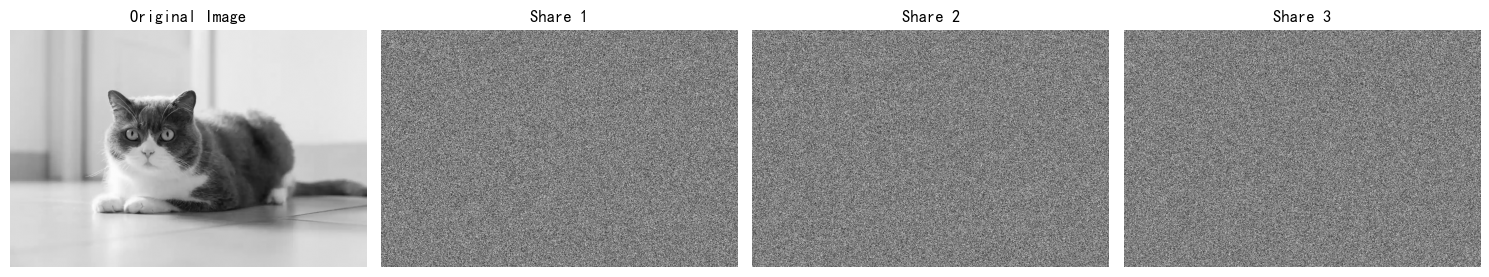

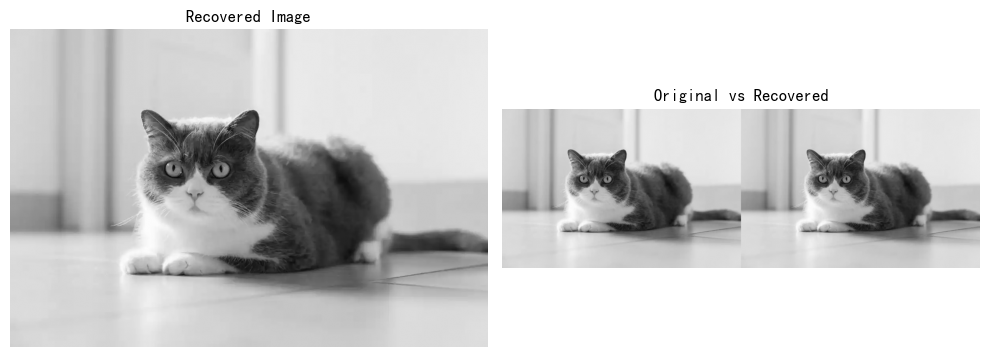

In [12]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

def lagrange_interpolate(points, x):
    result = 0.0
    n = len(points)
    for i in range(n):
        xi, yi = points[i]
        numerator = 1.0
        denominator = 1.0
        for j in range(n):
            if i != j:
                xj, yj = points[j]
                numerator *= (x - xj)
                denominator *= (xi - xj)
        result += yi * (numerator / denominator)
    return int(round(result)) % 256  # 确保像素值在0-255

def generate_shares(image_path, n, k):
    original = Image.open(image_path).convert('L')
    pixels = np.array(original)
    shares = []
    
    # 为每个像素生成多项式系数
    coefficients = np.random.randint(0, 256, size=(pixels.shape[0], pixels.shape[1], k-1))
    
    for s in range(n):
        share = np.zeros_like(pixels)
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]):
                p = pixels[i, j]
                coeffs = coefficients[i, j]
                # 构造多项式 f_s = p + a1*s + a2*s^2 + ... mod 256
                share[i, j] = (p + sum(coeffs[t] * (s+1)**(t+1) for t in range(k-1))) % 256
        shares.append(Image.fromarray(share))
    
    return original, shares

def reconstruct_image(shares, k):
    sample = shares[0]
    width, height = sample.size
    reconstructed = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(width):
        for j in range(height):
            # 收集k个点
            points = []
            for idx, share in enumerate(shares[:k]):
                x = idx + 1
                y = share.getpixel((i, j))
                points.append((x, y))
            # 进行Lagrange插值计算f(0)
            reconstructed[j, i] = lagrange_interpolate(points, 0)
    
    return Image.fromarray(reconstructed)

if __name__ == "__main__":
    # 生成子图并显示原始图像
    original, shares = generate_shares(r"c:\Users\21015\Desktop\cat.png", n=5, k=3)
    
    # 创建画布
    plt.figure(figsize=(15, 5))
    
    # 显示原始图像
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    
    # 显示前3个子图（每个子图独立显示）
    for i in range(3):
        plt.subplot(1, 4, i+2)
        plt.title(f"Share {i+1}")
        plt.imshow(shares[i], cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    # 恢复图像并显示
    recovered = reconstruct_image(shares[:3], k=3)
    
    # 对比显示
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Recovered Image")
    plt.imshow(recovered, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Original vs Recovered")
    combined = np.hstack([np.array(original), np.array(recovered)])
    plt.imshow(combined, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()